# **The Best Neighborhood according to *Vibe Check***

**Metric**: Sum of each Feature

**Data Sets:** 
1. "Fire Incidents in City of Pittsburgh"
2. "City of Pittsburgh Water Features"
3. "City of Pittsburgh Trees"

We picked a data set that describes trees in a neighborhood and used it to calaulate how many trees a neighborhood had and then compared that toa data set that told us how many water sources a neighborhood had. Then we compared those two aspects of the neighborhood to the amount of fire incidents in each neighborhood. After comparing all three data sets which ever neighborhood had the highest amount of water features, tree amounts and the least amount of fire incidents would be our idea of the best neighborhood. 

We picked to use Trees Water and Fire. We believe that these three features represent the best neighborhood because trees provide oxygen, water is necessary for survival and fire is scary so its no good. 

When coming up with our criteria for the best neighborhood there was discussion about maybe including what types of restaurants there were in a neighborhood or how many pets there were, but in the end we decided that we should just go with our first idea. We did this because: 

1. There was no datasets that represented the qualities we had discussed
2. We believe that trees,water, and fire incidents are more important qualities of a neighborhood than favorite food and cute animals. (Much debate on the last one)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

---
## ***We inserted our water dataset from the WPRDC.***

![alt text](https://media.giphy.com/media/xxO2I0OScT1tK/giphy.gif "Puppppy")

In [3]:
waterfeatures = pd.read_csv("https://data.wprdc.org/datastore/dump/513290a6-2bac-4e41-8029-354cbda6a7b7")
                           
waterfeatures.head()

,id,name,control_type,feature_type,inactive,make,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1816791851,Able Long Park,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Beechview,4,19,42003192000,5,19,6,4-28,40.408433,-80.028327
1,1599892422,Albert Turk Graham Park,On/Off,Drinking Fountain,f,Most Dependable,https://tools.wprdc.org/images/pittsburgh/wate...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440445,-79.984061
2,1422043278,Allegheny Commons Arch St,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454382,-80.008277
3,1237191582,Allegheny Commons East Tennis Courts,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.450866,-80.001959
4,1146184773,Allegheny Commons Pool,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.450995,-80.001498


---
## ***We inserted the fire dataset from the WPRDC.***

![alt text](https://media.giphy.com/media/NTur7XlVDUdqM/giphy.gif "Fire")

In [4]:
fire_incidents = pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
                    
fire_incidents.head()

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


---

## ***We inserted the Trees dataset from the WPRDC.***

![alt text](https://media.giphy.com/media/DZqsSiLR5KM12/giphy.gif "Tree")

In [5]:
pgh_trees = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da")
                           
pgh_trees.head()

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,754166088,7428,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,Well or Pit,...,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724
1,1946899269,220,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,Open or Unrestricted,...,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868
2,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,Well or Pit,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,Open or Unrestricted,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106


---

### ***In order to simplify things we decided to remove columns that we dont need to determine the best neighborhood.***


We grouped the data by neighborhood and ID because it would show us how many trees were in each neighborhood; which is the only information we want to analyze.

In [6]:
pgh_trees.groupby('neighborhood')['id'].count().sort_values(ascending=True)

neighborhood
Hays                            1
South Shore                     2
Glen Hazel                      2
Esplen                          3
Arlington Heights               5
Northview Heights               6
East Carnegie                   8
St. Clair                      12
Mt. Oliver                     13
Ridgemont                      31
Fairywood                      31
Chartiers City                 37
Spring Garden                  55
West Oakland                   78
Summer Hill                    79
Allentown                      84
Fineview                       90
Oakwood                        92
Homewood West                  92
Bon Air                        92
California-Kirkbride           94
Duquesne Heights              101
Arlington                     107
Spring Hill-City View         114
Windgap                       117
West End                      131
Beltzhoover                   170
Elliott                       171
Upper Hill                    179
N

---

### ***As you can see there is whole lot of data here so we decided to filter through all this data and simplify it. At the same time we also transformed our data back into a dataframe.***

Here our simplification process involved cutting down the neighborhoods we are looking at by just showing the top 12 neighborhoods with the highest amount of trees.

In [7]:
def filter_less_than(x, threshold):
    if len(x) <= threshold:
        return False
    else:
        return True
    
tree_amount = pgh_trees.groupby("neighborhood").filter(filter_less_than, 
                                                     threshold=873)

simple_treedisplay= pd.DataFrame(tree_amount.groupby("neighborhood")["id"].count().sort_values(ascending=True))

simple_treedisplay

,id
neighborhood,
Mount Washington,874
Brighton Heights,910
Central Business District,1002
Perry North,1007
Point Breeze,1316
East Liberty,1366
Bloomfield,1436
Shadyside,1558
South Side Flats,1693


### ***Just to make things interesting we created a pie chart for our simpledata so you can see it in a different format***

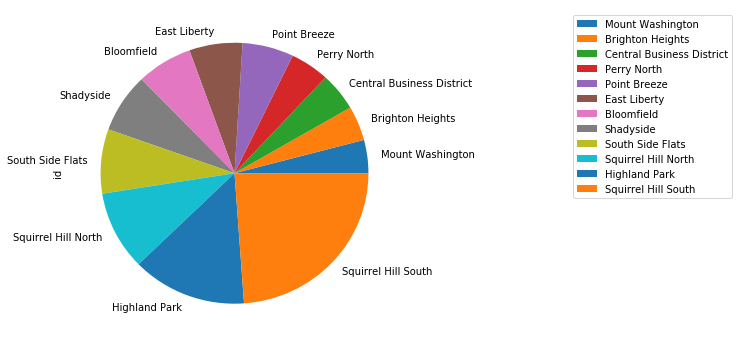

In [8]:
simple_treedisplay.plot.pie(y='id', figsize=(6,6))
plt.legend(bbox_to_anchor=(2,1));

![alt text](https://media.giphy.com/media/yFWUUCVeZ0ttS/giphy.gif "EARTH")

---
### ***We did the simplification process and creating a data frame with our Water data as well.***

In [9]:
waterfeatures.groupby('neighborhood')['id'].count().sort_values(ascending=True)

neighborhood
Lower Lawrenceville           1
East Hills                    1
Middle Hill                   1
New Homestead                 1
Central Northside             1
Oakwood                       1
Homewood West                 1
Squirrel Hill North           1
Point Breeze North            1
Bluff                         1
Stanton Heights               1
Strip District                1
Upper Lawrenceville           1
Bon Air                       1
Homewood South                1
South Side Slopes             2
Perry South                   2
Swisshelm Park                2
Upper Hill                    2
Marshall-Shadeland            2
West End                      2
Westwood                      2
Larimer                       2
Windgap                       2
Central Oakland               2
Allentown                     2
Hays                          2
Central Business District     2
Duquesne Heights              2
Central Lawrenceville         2
                           

In [10]:
def filter_less_than(x, threshold):
    if len(x) <= threshold:
        return False
    else:
        return True
    
water_amount = waterfeatures.groupby("neighborhood").filter(filter_less_than, 
                                                     threshold=5)

simple_waterdisplay= pd.DataFrame(water_amount.groupby("neighborhood")["id"].count().sort_values(ascending=True))

simple_waterdisplay

,id
neighborhood,
Allegheny Center,6
Brighton Heights,6
Carrick,6
Elliott,6
Spring Hill-City View,6
Troy Hill,6
Perry North,7
Point Breeze,7
Bloomfield,8


### ***Here is our pie chart depiction of this set of data***

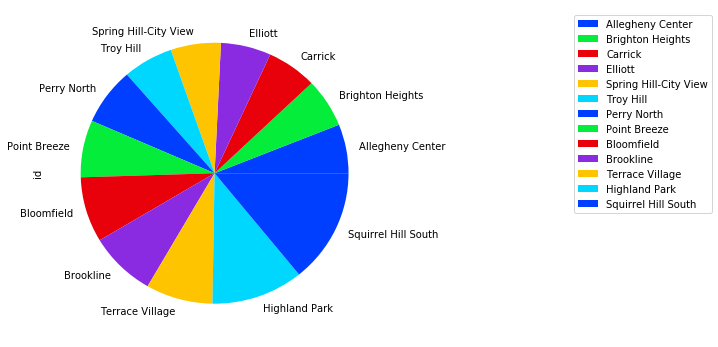

In [11]:
plt.style.use('seaborn-bright')
simple_waterdisplay.plot.pie(y='id', figsize=(6,6))
plt.legend(bbox_to_anchor=(2,1));

![alt text](https://media.giphy.com/media/F4w8zTcuwntv2/giphy.gif "WATER")

---

### ***After looking at our information we decided it wasn't the best idea to cut down the amount of data shown in our fire dataset because when trying to merge it with our other datasets later in our process we would need all the data. So, we just removed the columns that were unecessary and turned the set into a data frame.***

In [12]:
largesimplefire= pd.DataFrame(fire_incidents.groupby('neighborhood')['call_no'].count().sort_values(ascending=True))
largesimplefire

,call_no
neighborhood,
Mount Oliver Borough,4
Regent Square,6
East Carnegie,6
Mt. Oliver,7
Arlington Heights,9
Oakwood,10
Hays,11
Chartiers City,11
Swisshelm Park,11


### ***Unfortunatley there is too much data in this set. Making a pie chart for our fire data would not make any sense***

![alt text](https://media.giphy.com/media/d0O4zETPaQC08/giphy.gif "FIRE")

In [13]:
simple_treedisplay

,id
neighborhood,
Mount Washington,874
Brighton Heights,910
Central Business District,1002
Perry North,1007
Point Breeze,1316
East Liberty,1366
Bloomfield,1436
Shadyside,1558
South Side Flats,1693


In [14]:
simple_waterdisplay

,id
neighborhood,
Allegheny Center,6
Brighton Heights,6
Carrick,6
Elliott,6
Spring Hill-City View,6
Troy Hill,6
Perry North,7
Point Breeze,7
Bloomfield,8


### ***Now that we had all the dataframes that we needed, we continued to merge our data. We didnt want to create a too complicated code for Jupyter to handle so we just started by merging our tree and water data.***

In [15]:
waterandtree= pd.merge(simple_treedisplay,simple_waterdisplay, on='neighborhood')
waterandtree

,id_x,id_y
neighborhood,,
Brighton Heights,910,6
Perry North,1007,7
Point Breeze,1316,7
Bloomfield,1436,8
Highland Park,2941,11
Squirrel Hill South,5073,14


### ***Here we added our fire data to visualize all our data for the neighborhoods together***

In [16]:
fireWaterTree= pd.merge(waterandtree, largesimplefire, on='neighborhood')
fireWaterTree

,id_x,id_y,call_no
neighborhood,,,
Brighton Heights,910,6,105
Perry North,1007,7,84
Point Breeze,1316,7,57
Bloomfield,1436,8,120
Highland Park,2941,11,55
Squirrel Hill South,5073,14,180


### ***Then of course we had to make it look pretty and make more sense to a random viewer***

In [17]:
FWT1= pd.DataFrame({'Neighborhood': ['Brighton Heights','Perry North','Point Breeze',
                                   'Bloomfield', 'Highland Park', 'Squirrel Hill South'],
                   'Water Features':[6, 7, 7, 8, 11, 14],
                   'Trees': [910, 1007, 1316, 1436, 2941, 5073],
                   'Fire Incidents':[105, 83, 57, 120, 54, 178]})
FWT1

,Neighborhood,Water Features,Trees,Fire Incidents
0,Brighton Heights,6,910,105
1,Perry North,7,1007,83
2,Point Breeze,7,1316,57
3,Bloomfield,8,1436,120
4,Highland Park,11,2941,54
5,Squirrel Hill South,14,5073,178


### ***TA-DA!! By looking at this dataframe we can see what neighborhood is the best according to our metric...***

<h3> <center> Best Neighborhood = Highland Park </center> </h3>

### ***Now we decided to get fancy... We want to make a bar graph to represent all our data for our top 6 neighborhoods***

In order for our data to look astetically pleasing to the viewer we made a few adjustments to our numerical data.
We multiplied our water features data by 10 to increase the size and we divided our Tree data by 10 to decrease the size. Then when looking at the bar graph you can actually see all the information. 

In [18]:
FWT= pd.DataFrame({'Neighborhood': ['Brighton Heights','Perry North','Point Breeze',
                                   'Bloomfield', 'Highland Park', 'Squirrel Hill South'],
                   'Water Features/10':[60, 70, 70, 80, 110, 140],
                   'Trees x10': [91.0, 100.7, 131.6, 143.6, 294.1, 507.3],
                   'Fire Incidents':[105, 83, 57, 120, 54, 178]})
FWT

,Neighborhood,Water Features/10,Trees x10,Fire Incidents
0,Brighton Heights,60,91.0,105
1,Perry North,70,100.7,83
2,Point Breeze,70,131.6,57
3,Bloomfield,80,143.6,120
4,Highland Park,110,294.1,54
5,Squirrel Hill South,140,507.3,178


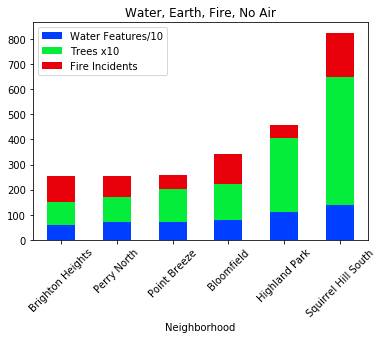

In [19]:
plt.style.use('seaborn-bright')
FWT.plot.bar(stacked=True, x='Neighborhood', title="Water, Earth, Fire, No Air", rot=45)

### ***Here is a pie chart of our "Best Neighborhood Data"***

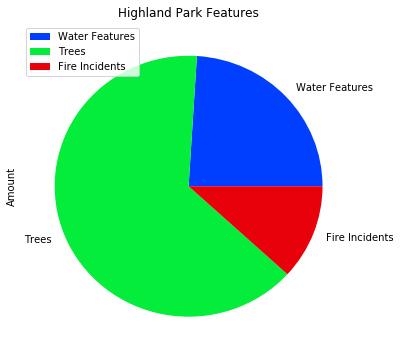

In [20]:
HPD= pd.DataFrame({'Amount':[110,294.1,54]}, 
                  index= ['Water Features','Trees','Fire Incidents'],
                 )
HPD.plot.pie(y='Amount',title= 'Highland Park Features', figsize=(6,6))

### **THE CRAZY RYAN EQUATION**

In [21]:
BestNeighborhood = FWT['Water Features/10'] + FWT['Trees x10'] - FWT['Fire Incidents']
BestNeighborhood

0     46.0
1     87.7
2    144.6
3    103.6
4    350.1
5    469.3
dtype: float64

**This rather simple mathematical equation helps us determine the best neighborhood. We simply add together the number of water features and the number of trees and then subtract that number by the number of fire incidents for each respective neighborhood. The highest number that this equation produces correlates to the best neighborhood. The highest number is 469.3 which correlates with our predicted best neighborhood of Highland Park.**

## **Conclusion Time**

#### Constantine's Conclusion:
I really don't know much about Pittsburgh and its neighborhood, to be honest I can't even regonize most of neighborhood in the data. However, this "best neighborhood" selected by us is quite match with my standard of "best neighborhood", I've been highland park for erval times and it is indeed a good neighborhood. Nervertheless, I am a person tend to rank things by my own experience; instead of using data and math formual, I would rather walking around and follow my guts to determine the best neighborhood. I think the key factor of a beighboehood is the environment, for a neighborhood is suppose to provide living space for people in there and environment is influence people's mental and physical health. In that case, I will focus on the factor like tress, gargabe and air condition. 

#### Ryan's Conclusion:
Our data-driven conclusion of the best neighborhood does not align with my personal view of the best neighborhood. Although I am not entirely sure which neighborhood is my favorite (I've only been a Pittsburgh a few months) I would not base it off of our data-driven research. There is much more to a neighborhood than trees and water features. Although, If the three data sets we used were really important to me, this would be a good guide to my favorite neighborhood; However, as much as I like trees and water features and dislike fires, there are much more important factors I would take into consideration when choosing my ideal neighborhood. Choosing a favorite neighborhood would also come down to personal preference and experience as well.

#### Isabela's Conclusion:
I am really new to Pittsburgh and havent really had the chance to go exploring. Due to this fact, I dont really have a favorite neighborhood, but when I do decide on what neighborhood is my favorite I would probably not use this metric to determine it. I personally rely more on the feeling of the place which isn't a data driven determination. Our data driven determination has a bunch of realistic facts to support the "Best Neighborhood" definition. My process of determining the best of something has nothing to do with facts. I chose based on how I feel when walking around a city and different things that that the city provides that make the people there feel happy. I guess when determining this feeling I could use data to support these feelings with facts about safety and community events, but in the end it all depends on the feeling I have by the end of my exploration of a neighborhood. Even if a neighborhood had the highest score in safety and community events if I don't leave feeling happy I would not consider it the Best Neighborhood.